In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sum([-0.3641, -0.4728, -0.6415, -0.0695, -0.7473, -0.6812, -0.1005, -0.5228, -0.4966, -0.4189, -0.5221,  1.0000, -0.3559, -0.4470])

-4.8402

In [3]:
a = np.array([[ 1.0000,  0.8703,  0.3401,  0.3679,  0.5515,  0.7571,  0.6729,  0.2406,
          0.1726,  0.8621,  0.6890, -0.3641,  0.6794,  0.6693],
        [ 0.8703,  1.0000,  0.7038,  0.3444,  0.5875,  0.8834,  0.8166,  0.4638,
          0.5040,  0.9004,  0.6729, -0.4728,  0.5986,  0.7392],
        [ 0.3401,  0.7038,  1.0000,  0.2551,  0.4587,  0.8072,  0.4716,  0.4337,
          0.8354,  0.6116,  0.5861, -0.6415,  0.3675,  0.4526],
        [ 0.3679,  0.3444,  0.2551,  1.0000,  0.2471,  0.3096,  0.4821, -0.0883,
         -0.0936,  0.6741,  0.4391, -0.0695,  0.7428,  0.3373],
        [ 0.5515,  0.5875,  0.4587,  0.2471,  1.0000,  0.5183,  0.3905,  0.5654,
          0.0636,  0.5717,  0.4668, -0.7473,  0.5791,  0.4797],
        [ 0.7571,  0.8834,  0.8072,  0.3096,  0.5183,  1.0000,  0.5994,  0.3258,
          0.6743,  0.8249,  0.8199, -0.6812,  0.5031,  0.7220],
        [ 0.6729,  0.8166,  0.4716,  0.4821,  0.3905,  0.5994,  1.0000,  0.2634,
          0.1843,  0.8043,  0.5590, -0.1005,  0.4106,  0.6117],
        [ 0.2406,  0.4638,  0.4337, -0.0883,  0.5654,  0.3258,  0.2634,  1.0000,
          0.2610,  0.1916, -0.0832, -0.5228,  0.1015,  0.4692],
        [ 0.1726,  0.5040,  0.8354, -0.0936,  0.0636,  0.6743,  0.1843,  0.2610,
          1.0000,  0.3364,  0.3899, -0.4966,  0.1006,  0.2338],
        [ 0.8621,  0.9004,  0.6116,  0.6741,  0.5717,  0.8249,  0.8043,  0.1916,
          0.3364,  1.0000,  0.7875, -0.4189,  0.8107,  0.6648],
        [ 0.6890,  0.6729,  0.5861,  0.4391,  0.4668,  0.8199,  0.5590, -0.0832,
          0.3899,  0.7875,  1.0000, -0.5221,  0.5208,  0.3857],
        [-0.3641, -0.4728, -0.6415, -0.0695, -0.7473, -0.6812, -0.1005, -0.5228,
         -0.4966, -0.4189, -0.5221,  1.0000, -0.3559, -0.4470],
        [ 0.6794,  0.5986,  0.3675,  0.7428,  0.5791,  0.5031,  0.4106,  0.1015,
          0.1006,  0.8107,  0.5208, -0.3559,  1.0000,  0.3771],
        [ 0.6693,  0.7392,  0.4526,  0.3373,  0.4797,  0.7220,  0.6117,  0.4692,
          0.2338,  0.6648,  0.3857, -0.4470,  0.3771,  1.0000]])

In [5]:
a.sum(axis=0), a.sum(axis=1)

(array([ 7.5087,  8.6121,  6.6819,  4.9481,  5.7326,  8.0638,  7.1659,
         3.6217,  4.1657,  8.6212,  6.7114, -4.8402,  6.4359,  6.6954]),
 array([ 7.5087,  8.6121,  6.6819,  4.9481,  5.7326,  8.0638,  7.1659,
         3.6217,  4.1657,  8.6212,  6.7114, -4.8402,  6.4359,  6.6954]))

In [2]:
data = pd.read_csv('../../data/g-research-crypto-forecasting/train.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,2018-01-01 00:01:00,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,2018-01-01 00:01:00,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,2018-01-01 00:01:00,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [3]:
'''
timestamp - A timestamp for the minute covered by the row.
Asset_ID - An ID code for the cryptoasset.
Count - The number of trades that took place this minute.
Open - The USD price at the beginning of the minute.
High - The highest USD price during the minute.
Low - The lowest USD price during the minute.
Close - The USD price at the end of the minute.
Volume - The number of cryptoasset units traded during the minute.
VWAP - The volume weighted average price for the minute.
Target - 15 minute residualized returns. See the 'Prediction and Evaluation' section of this notebook for details of how the target is calculated.
'''

"\ntimestamp - A timestamp for the minute covered by the row.\nAsset_ID - An ID code for the cryptoasset.\nCount - The number of trades that took place this minute.\nOpen - The USD price at the beginning of the minute.\nHigh - The highest USD price during the minute.\nLow - The lowest USD price during the minute.\nClose - The USD price at the end of the minute.\nVolume - The number of cryptoasset units traded during the minute.\nVWAP - The volume weighted average price for the minute.\nTarget - 15 minute residualized returns. See the 'Prediction and Evaluation' section of this notebook for details of how the target is calculated.\n"

In [4]:
sorted(data['Asset_ID'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [5]:
data.describe()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676483e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [6]:
asset_details = pd.read_csv('../../data/g-research-crypto-forecasting/asset_details.csv')
id_to_names = dict(zip(asset_details['Asset_ID'], asset_details['Asset_Name']))

In [7]:
data['Asset_Name'] = [id_to_names[a] for a in data['Asset_ID']]

In [12]:
id_to_names

{2: 'Bitcoin Cash',
 0: 'Binance Coin',
 1: 'Bitcoin',
 5: 'EOS.IO',
 7: 'Ethereum Classic',
 6: 'Ethereum',
 9: 'Litecoin',
 11: 'Monero',
 13: 'TRON',
 12: 'Stellar',
 3: 'Cardano',
 8: 'IOTA',
 10: 'Maker',
 4: 'Dogecoin'}

In [8]:
data.sort_values(['timestamp', 'Asset_ID'], inplace=True)
data.set_index(['timestamp', 'Asset_ID'])

Count          Open          High           Low  \
timestamp           Asset_ID                                                    
2018-01-01 00:01:00 0           5.0      8.530000      8.530000      8.530000   
                    1         229.0  13835.194000  14013.800000  13666.110000   
                    2          40.0   2376.580000   2399.500000   2357.140000   
                    5          32.0      7.659600      7.659600      7.656700   
                    6         173.0    738.302500    746.000000    732.510000   
...                             ...           ...           ...           ...   
2021-09-21 00:00:00 9         775.0    157.181571    157.250000    156.700000   
                    10         34.0   2437.065067   2438.000000   2430.226900   
                    11         48.0    232.695000    232.800000    232.240000   
                    12        177.0      0.282168      0.282438      0.281842   
                    13        380.0      0.091390      0.091527      0.091260   

                                     Close        Volume          VWAP  \
timestamp           Asset_ID                                             
2018-01-01 00:01:00 0             8.530000  7.838000e+01      8.530000   
                    1         13850.176000  3.155006e+01  13827.062093   
                    2          2374.590000  1.923301e+01   2373.116392   
                    5             7.657600  6.626713e+03      7.657713   
                    6           738.507500  3.359879e+02    738.839291   
...                                    ...           ...           ...   
2021-09-21 00:00:00 9           156.943857  4.663725e+03    156.994319   
                    10         2432.907467  3.975460e+00   2434.818747   
                    11          232.275000  1.035123e+02    232.569697   
                    12            0.282051  1.828508e+05      0.282134   
                    13            0.091349  2.193732e+06      0.091388   

                                Target    Asset_Name  
timestamp           Asset_ID                          
2018-01-01 00:01:00 0        -0.014399  Binance Coin  
                    1        -0.014643       Bitcoin  
                    2        -0.004218  Bitcoin Cash  
                    5        -0.013922        EOS.IO  
                    6        -0.004809      Ethereum  
...                                ...           ...  
2021-09-21 00:00:00 9              NaN      Litecoin  
                    10             NaN         Maker  
                    11             NaN        Monero  
                    12             NaN       Stellar  
                    13             NaN          TRON  

[24236806 rows x 9 columns]

In [9]:
data[['Close', 'Low', 'High']]

,Close,Low,High
1,8.530000,8.530000,8.530000
2,13850.176000,13666.110000,14013.800000
0,2374.590000,2357.140000,2399.500000
3,7.657600,7.656700,7.659600
5,738.507500,732.510000,746.000000
...,...,...,...
24236801,156.943857,156.700000,157.250000
24236802,2432.907467,2430.226900,2438.000000
24236805,232.275000,232.240000,232.800000
24236804,0.282051,0.281842,0.282438


In [40]:
close_by_asset = []
for asset_id in range(14):
    tmp = data[data['Asset_ID'] == asset_id].set_index('timestamp')
    close_by_asset.append(tmp['Close'])

In [41]:
close_by_asset = pd.concat(close_by_asset, axis=1)
close_by_asset.columns = [id_to_names[i] for i in range(14)]

In [42]:
log_returns_by_asset = np.log(close_by_asset) - np.log(close_by_asset.shift(1))

In [43]:
log_returns_by_asset

,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
timestamp,,,,,,,,,,,,,,
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,-0.001819,-0.001595,-0.000970,NaN,NaN,-0.000118,-0.000335,0.000773,NaN,-0.001555,NaN,-0.000030,NaN,NaN
2018-01-01 00:03:00,-0.003494,-0.001939,-0.000094,NaN,NaN,-0.000719,-0.001027,0.021866,NaN,0.005072,NaN,-0.000790,NaN,NaN
2018-01-01 00:04:00,0.001896,-0.002414,-0.000631,NaN,NaN,-0.002015,-0.000543,-0.000756,NaN,-0.007662,NaN,-0.003134,NaN,NaN
2018-01-01 00:05:00,-0.005296,-0.003137,-0.000166,NaN,NaN,-0.003385,-0.001898,-0.000473,NaN,-0.002031,NaN,-0.002227,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,-0.003282,-0.002007,-0.002363,-0.007796,-0.003144,-0.003516,-0.003137,-0.001912,-0.004869,-0.002359,-0.003641,-0.002766,-0.003261,-0.002754
2021-09-20 23:57:00,-0.001980,-0.000910,-0.005945,-0.000610,-0.002531,-0.002115,-0.001305,-0.004158,-0.002737,-0.003906,-0.002640,-0.003065,-0.002748,-0.003939
2021-09-20 23:58:00,-0.000945,-0.000770,0.000158,-0.000583,-0.000596,-0.000822,-0.001165,-0.001059,-0.001528,-0.001038,0.000692,-0.000551,-0.002100,-0.000041


In [68]:
accepted_timestamps = sorted(data['timestamp'].unique())[-100000:]

In [69]:
accepted_timestamp_threshold = accepted_timestamps[0]

In [70]:
data[data['timestamp'] > accepted_timestamp_threshold]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name
22837265,2021-07-13 13:20:00,0,590.0,308.624000,308.780000,308.040000,308.090000,1.338838e+03,308.433120,0.001776,Binance Coin
22837266,2021-07-13 13:20:00,1,2121.0,32498.675714,32507.150000,32466.340000,32483.062857,9.460592e+01,32490.249703,0.000525,Bitcoin
22837264,2021-07-13 13:20:00,2,120.0,468.620000,468.820000,468.180000,468.455000,7.332641e+01,468.524402,0.001249,Bitcoin Cash
22837263,2021-07-13 13:20:00,3,1118.0,1.278700,1.284200,1.277500,1.280126,1.293379e+06,1.279804,0.000525,Cardano
22837267,2021-07-13 13:20:00,4,1605.0,0.201067,0.202080,0.200800,0.201250,9.043222e+06,0.201383,-0.003759,Dogecoin
...,...,...,...,...,...,...,...,...,...,...,...
24236801,2021-09-21 00:00:00,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN,Litecoin
24236802,2021-09-21 00:00:00,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN,Maker
24236805,2021-09-21 00:00:00,11,48.0,232.695000,232.800000,232.240000,232.275000,1.035123e+02,232.569697,NaN,Monero
24236804,2021-09-21 00:00:00,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN,Stellar


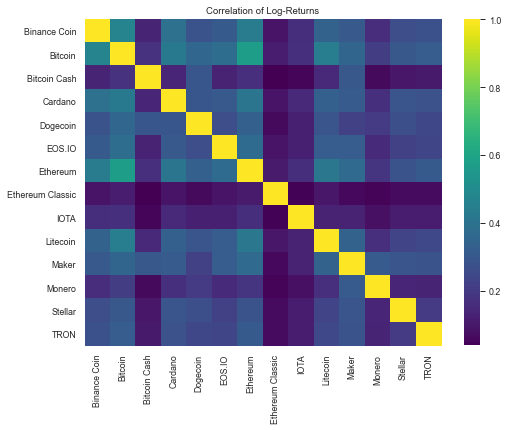

In [61]:
sns.set_style('darkgrid')
sns.set_context('paper')
fig = plt.figure(figsize=(8, 6))
sns.heatmap(log_returns_by_asset.corr(), cmap='viridis') # gist_earth
plt.title('Correlation of Log-Returns')
plt.savefig('../../figures/correlation.pdf')
plt.show()

In [9]:
# test_idx = 
# data.set_index(['timestamp', 'Asset_ID']).loc[data['timestamp'].min()].values
# data.set_index(['timestamp', 'Asset_ID'])['Target']

array([[5.0, 8.53, 8.53, 8.53, 8.53, 78.38, 8.53, -0.0143989664689647,
        'Binance Coin'],
       [229.0, 13835.194, 14013.8, 13666.11, 13850.176, 31.55006152,
        13827.062092689885, -0.0146432243557361, 'Bitcoin'],
       [40.0, 2376.58, 2399.5, 2357.14, 2374.59, 19.23300519,
        2373.1163915061647, -0.0042181523874292, 'Bitcoin Cash'],
       [32.0, 7.6596, 7.6596, 7.6567, 7.6576, 6626.713369870001,
        7.657712894055892, -0.0139224470071963, 'EOS.IO'],
       [173.0, 738.3025, 746.0, 732.51, 738.5075, 335.98785619,
        738.839291493523, -0.0048086040148456, 'Ethereum'],
       [5.0, 25.92, 25.92, 25.874, 25.877, 121.08731, 25.89136300520674,
        -0.0082635054253386, 'Ethereum Classic'],
       [167.0, 225.33, 227.78, 222.98, 225.20666666666668, 411.89664234,
        225.1979435524601, -0.0097914226840802, 'Litecoin'],
       [7.0, 329.09, 329.88, 329.09, 329.46, 6.63571014,
        329.4541176122712, nan, 'Monero']], dtype=object)

In [11]:
data.isnull().sum() / len(data)

timestamp     0.000000e+00
Asset_ID      0.000000e+00
Count         0.000000e+00
Open          0.000000e+00
High          0.000000e+00
Low           0.000000e+00
Close         0.000000e+00
Volume        0.000000e+00
VWAP          3.713361e-07
Target        3.095862e-02
Asset_Name    0.000000e+00
dtype: float64

In [12]:
data.fillna(method='ffill', inplace=True)
data.fillna(value=0, inplace=True)

In [13]:
data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name
1,2018-01-01 00:01:00,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,Binance Coin
2,2018-01-01 00:01:00,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,Bitcoin
0,2018-01-01 00:01:00,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,Bitcoin Cash
3,2018-01-01 00:01:00,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,EOS.IO
5,2018-01-01 00:01:00,6,173.0,738.3025,746.0000,732.5100,738.5075,335.987856,738.839291,-0.004809,Ethereum


In [14]:
import torch
from torch.utils.data import Dataset, IterableDataset, DataLoader

In [15]:
class CryptoFeed(Dataset):
    def __init__(self, df, technicals=None):
        """
        Args:
            df: pandas Dataframe, contains price data on crypto assets. Assumes 
            technicals: dict, string (key) mapped to function (value) that calculates technical indicator from df
        """
        df.sort_values(['timestamp', 'Asset_ID'], inplace=True)
        
        self.features = df.copy()
        if technicals is not None:
            for k, v in technicals.items():
                self.features[k] = v(df)
        self.features.set_index(['timestamp', 'Asset_ID'], inplace=True)
        for col in ['timestamp', 'Asset_ID', 'Asset_Name', 'Target']:
            if col in self.features.columns:
                self.features.drop(col, axis=1, inplace=True)
                
        self.targets = df.set_index(['timestamp', 'Asset_ID'])['Target']
        self.index_to_date = dict(zip(range(len(df['timestamp'].unique)), sorted(df['timestamp'].unique())))
    
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, idx):
        date = self.index_to_date[idx]
        return self.features.loc[date].values, self.targets.loc[date].values

In [16]:
class CryptoFeed(IterableDataset):
    def __init__(self, df, seq_len=5, technicals=None):
        """
        Creates an iterable feed of crypto market states increasing in time given an input df

        Args:
            df: pandas Dataframe, contains price data on crypto assets. Assumes 
            technicals: dict, string (key) mapped to function (value) that calculates technical indicator from df
        """
        df.sort_values(['timestamp', 'Asset_ID'], inplace=True)
        
        self.id_to_name = dict(zip(df['Asset_ID'], df['Asset_Name']))
        self.data = [df[df['Asset_ID'] == i].copy() for i in sorted(df['Asset_ID'].unique())]
        self.targets = pd.concat([tdf.set_index('timestamp')['Target'] for tdf in self.data], axis=1)

        if technicals is not None:
            for tdf in self.data:
                for k, v in technicals.items():
                    tdf[k] = v(tdf)
        for tdf in self.data:
            tdf.set_index('timestamp', inplace=True)
        for col in ['timestamp', 'Asset_ID', 'Asset_Name', 'Target']:
            for tdf in self.data:
                if col in tdf.columns:
                    tdf.drop(col, axis=1, inplace=True)

        self.features = pd.concat(self.data, axis=1)
                        
        self.seq_len = seq_len
        self.valid_dates = list(self.features.index)
        # self.num_valid_starts = self.features.shape[0] - self.seq_len
    
    def __len__(self):
        return self.features.shape[0]
    
    def __iter__(self):
        for i in range(self.seq_len, len(self.valid_dates)):
            dates_idx = self.valid_dates[i-self.seq_len:i]
            features = self.features.loc[dates_idx].values
            target = self.targets.loc[dates_idx[-1]].values # target is target of end of window
            adj = self.targets.loc[dates_idx].corr().values # correlation matrix between previous seq_len target values
            print(self.targets.loc[dates_idx])
            print(self.targets.loc[dates_idx].corr())
            print(adj)
            yield features, target, adj

In [17]:
dataset = CryptoFeed(data)

In [18]:
dataloader = DataLoader(dataset)

In [19]:
i = 0
for x, y, a in dataloader:
    if i > 2:
        break
    print(x.shape, y.shape, a.shape)
    i += 1

                       Target    Target    Target  Target  Target    Target  \
timestamp                                                                     
2018-01-01 00:01:00 -0.014399 -0.014643 -0.004218     NaN     NaN -0.013922   
2018-01-01 00:02:00 -0.015875 -0.015037 -0.004079     NaN     NaN -0.014534   
2018-01-01 00:03:00 -0.015410 -0.010309 -0.002892     NaN     NaN -0.012546   
2018-01-01 00:04:00 -0.012524 -0.008999 -0.003718     NaN     NaN -0.011170   
2018-01-01 00:05:00 -0.005940 -0.008079 -0.002171     NaN     NaN -0.006154   

                       Target    Target  Target    Target  Target    Target  \
timestamp                                                                     
2018-01-01 00:01:00 -0.004809 -0.008264     NaN -0.009791     NaN -0.009791   
2018-01-01 00:02:00 -0.004441 -0.029902     NaN -0.012991     NaN -0.009690   
2018-01-01 00:03:00 -0.004206 -0.030832     NaN -0.003572     NaN  0.006567   
2018-01-01 00:04:00 -0.002205 -0.028899     NaN -0.

In [ ]:
a.squeeze()

In [76]:
len(dataset)

1956782

In [81]:
pd.DataFrame(np.random.random((4, 3))).values

array([[0.21048091, 0.07814175, 0.21098803],
       [0.88533118, 0.63138025, 0.91717235],
       [0.03144147, 0.22048096, 0.1377318 ],
       [0.46196295, 0.21895655, 0.89900687]])

In [22]:
def test():
    print('something')

In [24]:
func = eval('test')
func()

something


In [20]:
dtw = pd.read_csv('../../data/forecast_1.csv')

In [21]:
dtw = dtw.rename({'Unnamed: 0': 'timestamp', 0: 'DTW'}, axis=1)
dtw.head()

,timestamp,0
0,2021-09-21 00:00:00,NaN
1,2021-09-20 23:59:00,NaN
2,2021-09-20 23:58:00,NaN
3,2021-09-20 23:57:00,NaN
4,2021-09-20 23:56:00,NaN


In [22]:
dtw.shape

(7146, 2)

In [19]:
dtw['timestamp'].min(), dtw['timestamp'].max()

('2021-09-16 00:55:00', '2021-09-21 00:00:00')

In [9]:
dtw.isnull().sum() / len(dtw)

Unnamed: 0    0.00000
0             0.02074
dtype: float64